In [1]:
import warnings
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas 
import datetime
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error


In [2]:
plt.style.use('fivethirtyeight')

In [ ]:
folder_path = "./Dataset/Patna/Dynamic/"  # Replace with the path to your folder

os.listdir(folder_path)

['arima_CH4.ipynb',
 'arima_CO.ipynb',
 'arima_CO2.ipynb',
 'arima_NO2.ipynb',
 'arima_no2.py',
 'arima_pm10.ipynb',
 'arima_pm25.ipynb',
 'arima_relative_humidity.ipynb',
 'arima_temp.ipynb',
 'datacoll.ipynb',
 'teststreamlit.py',
 'vayu.db',
 'vayu_Patna_dynamic_sensor_data_August_2024.csv',
 'vayu_Patna_dynamic_sensor_data_December_2024.csv',
 'vayu_Patna_dynamic_sensor_data_February_2025.csv',
 'vayu_Patna_dynamic_sensor_data_January_2025.csv',
 'vayu_Patna_dynamic_sensor_data_July_2024.csv',
 'vayu_Patna_dynamic_sensor_data_June_2024.csv',
 'vayu_Patna_dynamic_sensor_data_March_2025.csv',
 'vayu_Patna_dynamic_sensor_data_November_2024.csv',
 'vayu_Patna_dynamic_sensor_data_October_2024.csv',
 'vayu_Patna_dynamic_sensor_data_September_2024.csv']

In [ ]:
color = sns.color_palette()
print('Please wait. Importing data...')
multi_df = []

# df = pd.read_csv("vayu_Patna_dynamic_sensor_data_March_2025.csv", encoding = "ISO-8859-1")


# Folder containing the CSV files
folder_path = "./Dataset/Patna/Dynamic/"  # Replace with the path to your folder

# Loop through all files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file)
        print(f"Reading {file_path}...")
        df1 = pd.read_csv(file_path, encoding="ISO-8859-1")  # Adjust encoding if needed
        multi_df.append(df1)

# Combine all DataFrames into one
df = pd.concat(multi_df, ignore_index=True)

print('import completed.')

Please wait. Importing data...
Reading ./vayu_Patna_dynamic_sensor_data_August_2024.csv...
Reading ./vayu_Patna_dynamic_sensor_data_December_2024.csv...
Reading ./vayu_Patna_dynamic_sensor_data_February_2025.csv...
Reading ./vayu_Patna_dynamic_sensor_data_January_2025.csv...
Reading ./vayu_Patna_dynamic_sensor_data_July_2024.csv...
Reading ./vayu_Patna_dynamic_sensor_data_June_2024.csv...


/tmp/ipykernel_45306/3742040145.py:16: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file_path, encoding="ISO-8859-1")  # Adjust encoding if needed


Reading ./vayu_Patna_dynamic_sensor_data_March_2025.csv...
Reading ./vayu_Patna_dynamic_sensor_data_November_2024.csv...
Reading ./vayu_Patna_dynamic_sensor_data_October_2024.csv...
Reading ./vayu_Patna_dynamic_sensor_data_September_2024.csv...
import completed.


In [5]:
def date_parser(x):
    return datetime.datetime.strptime(x, '%Y-%m-%d')

In [6]:
df.head()

,id,device_name,lat,long,pm_25,pm_10,no2,co,co2,ch4,temp,rh,data_created_time
0,1394763,TARA101,25.586355,85.178223,29.4,55.8,14.37,1.48,NaN,NaN,36.8,57.0,2024-08-01 00:00:00+00:00
1,1394785,TARA070,25.598154,85.171898,15.0,20.3,972.01,NaN,611.0,NaN,34.6,63.0,2024-08-01 00:00:00+00:00
2,1394786,TARA082,25.640917,85.104034,15.6,15.6,101.67,NaN,1258.0,NaN,28.6,45.0,2024-08-01 00:00:00+00:00
3,1394793,TARA090,25.599537,85.177139,28.6,38.6,532.40,NaN,462.0,NaN,34.1,66.0,2024-08-01 00:00:00+00:00
4,1394809,TARA101,25.586355,85.178223,39.3,63.3,4.57,1.35,NaN,NaN,36.8,57.0,2024-08-01 00:01:00+00:00


In [7]:
patna_data_rh = df[['data_created_time', 'rh']]

In [8]:
# patna_data = df[df.state == 'patna'].sort_values(by='date', ascending=0)
# patna_data_rh = df[['date', 'rh']]
patna_data_rh['rh'] = patna_data_rh['rh'].map(lambda x: str(x))
patna_data_rh = patna_data_rh[patna_data_rh.rh != 'nan']
patna_data_rh['rh'] = pd.to_numeric(patna_data_rh['rh'])
patna_data_rh['date'] = patna_data_rh['data_created_time'].map(lambda x: str(x)[:10])
patna_data_rh['date'] = patna_data_rh['date'].map(lambda x: date_parser(x))
patna_data_rh.index = patna_data_rh['date']
patna_data_rh = patna_data_rh.drop(['date'], axis=1)

/tmp/ipykernel_45306/3690182921.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patna_data_rh['rh'] = patna_data_rh['rh'].map(lambda x: str(x))


In [9]:
patna_data_rh.tail()

,data_created_time,rh
date,,
2024-09-30,2024-09-30 23:58:00+00:00,70.0
2024-09-30,2024-09-30 23:58:00+00:00,67.0
2024-09-30,2024-09-30 23:59:00+00:00,62.0
2024-09-30,2024-09-30 23:59:00+00:00,70.0
2024-09-30,2024-09-30 23:59:00+00:00,67.0


In [10]:
patna_data_rh = patna_data_rh.fillna(patna_data_rh.bfill())
patna_data_rh = patna_data_rh['rh'].resample('D').mean()

date
2024-06-07    28.037776
2024-06-08    33.890026
2024-06-09    39.076009
2024-06-10    46.497795
2024-06-11    45.872426
                ...    
2025-03-14    37.123851
2025-03-15    36.358140
2025-03-16    37.406833
2025-03-17    34.703150
2025-03-18    29.111111
Freq: D, Name: rh, Length: 285, dtype: float64


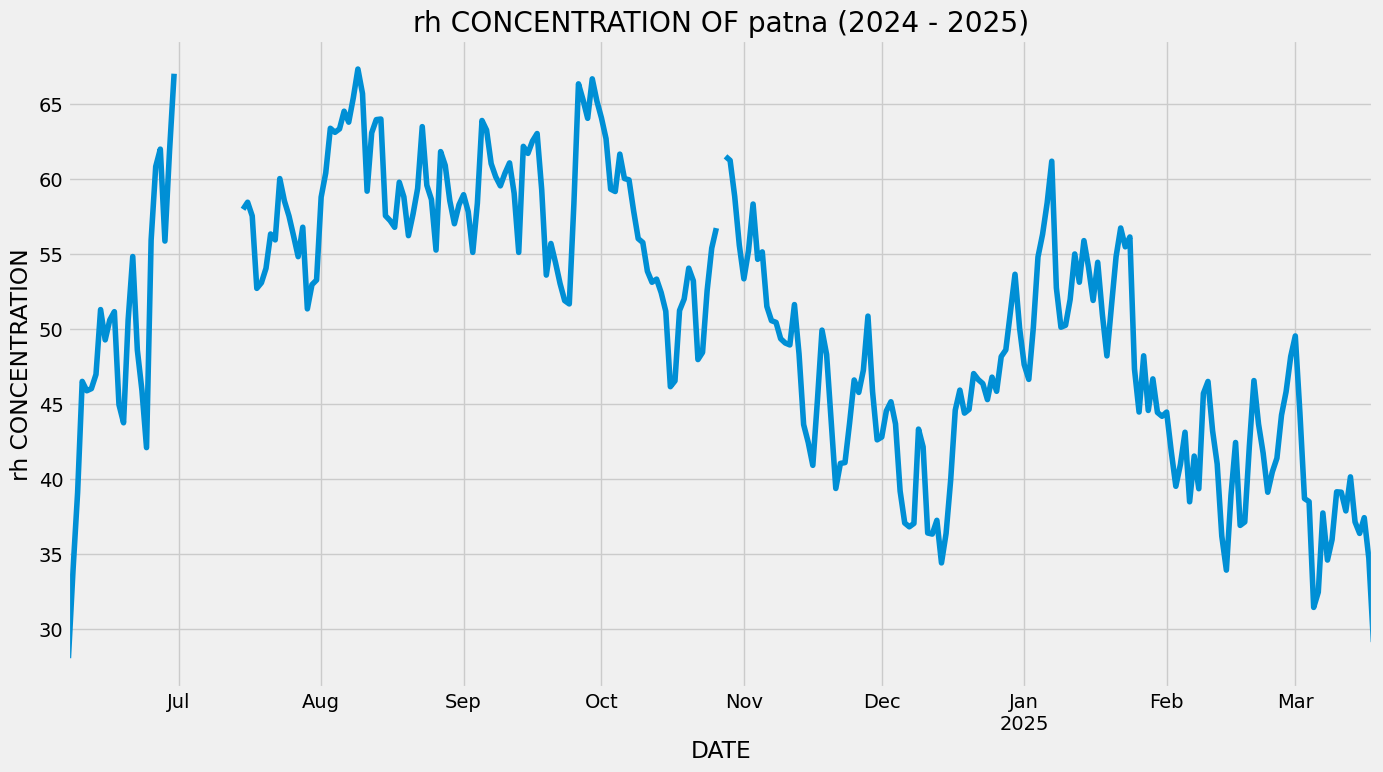

In [11]:

print(patna_data_rh)

patna_data_rh.plot(figsize=[15, 8])
plt.xlabel("DATE")
plt.ylabel("rh CONCENTRATION")
plt.title("rh CONCENTRATION OF patna (2024 - 2025)")
plt.show()

/home/deepesh/miniconda3/envs/myenv/lib/python3.8/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


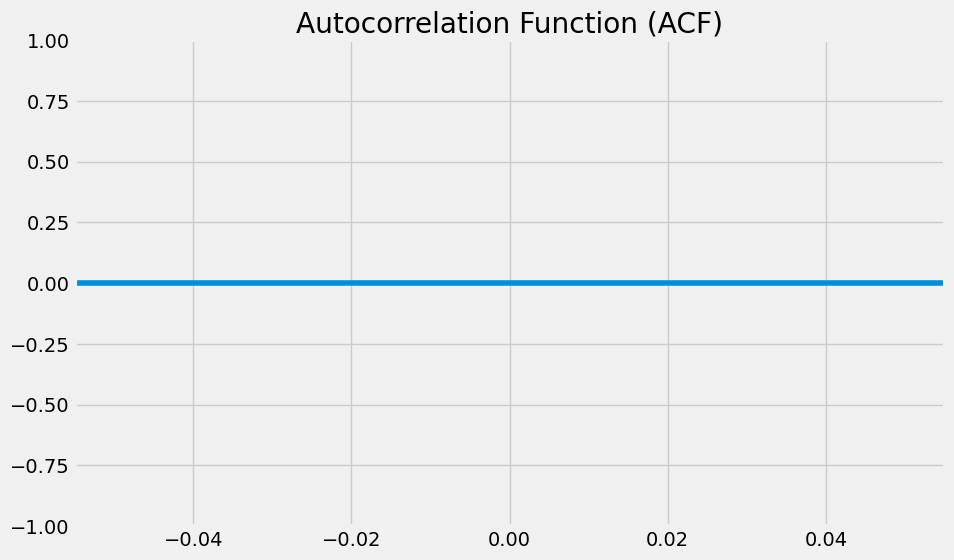

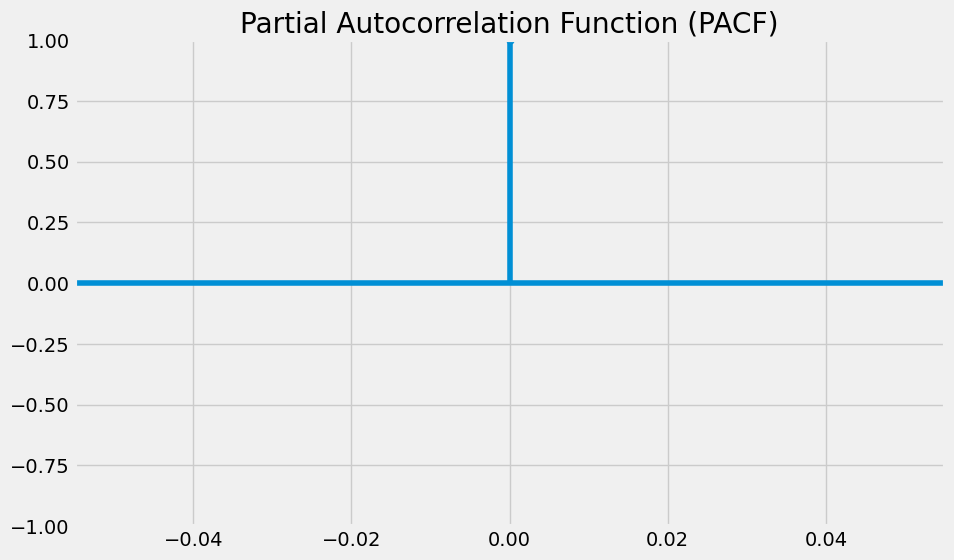

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(patna_data_rh, lags=30, ax=plt.gca())  # Adjust lags as needed
plt.title("Autocorrelation Function (ACF)")
plt.show()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(patna_data_rh, lags=30, ax=plt.gca(), method='ywm')  # Adjust lags as needed
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.46487D+00    |proj g|=  6.78905D-01

At iterate    5    f=  2.31200D+00    |proj g|=  1.25654D-01

At iterate   10    f=  2.30603D+00    |proj g|=  5.94729D-01

At iterate   15    f=  2.29951D+00    |proj g|=  5.37249D-02

At iterate   20    f=  2.29899D+00    |proj g|=  4.02260D-02

At iterate   25    f=  2.29891D+00    |proj g|=  1.96472D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     41      1     0     0   

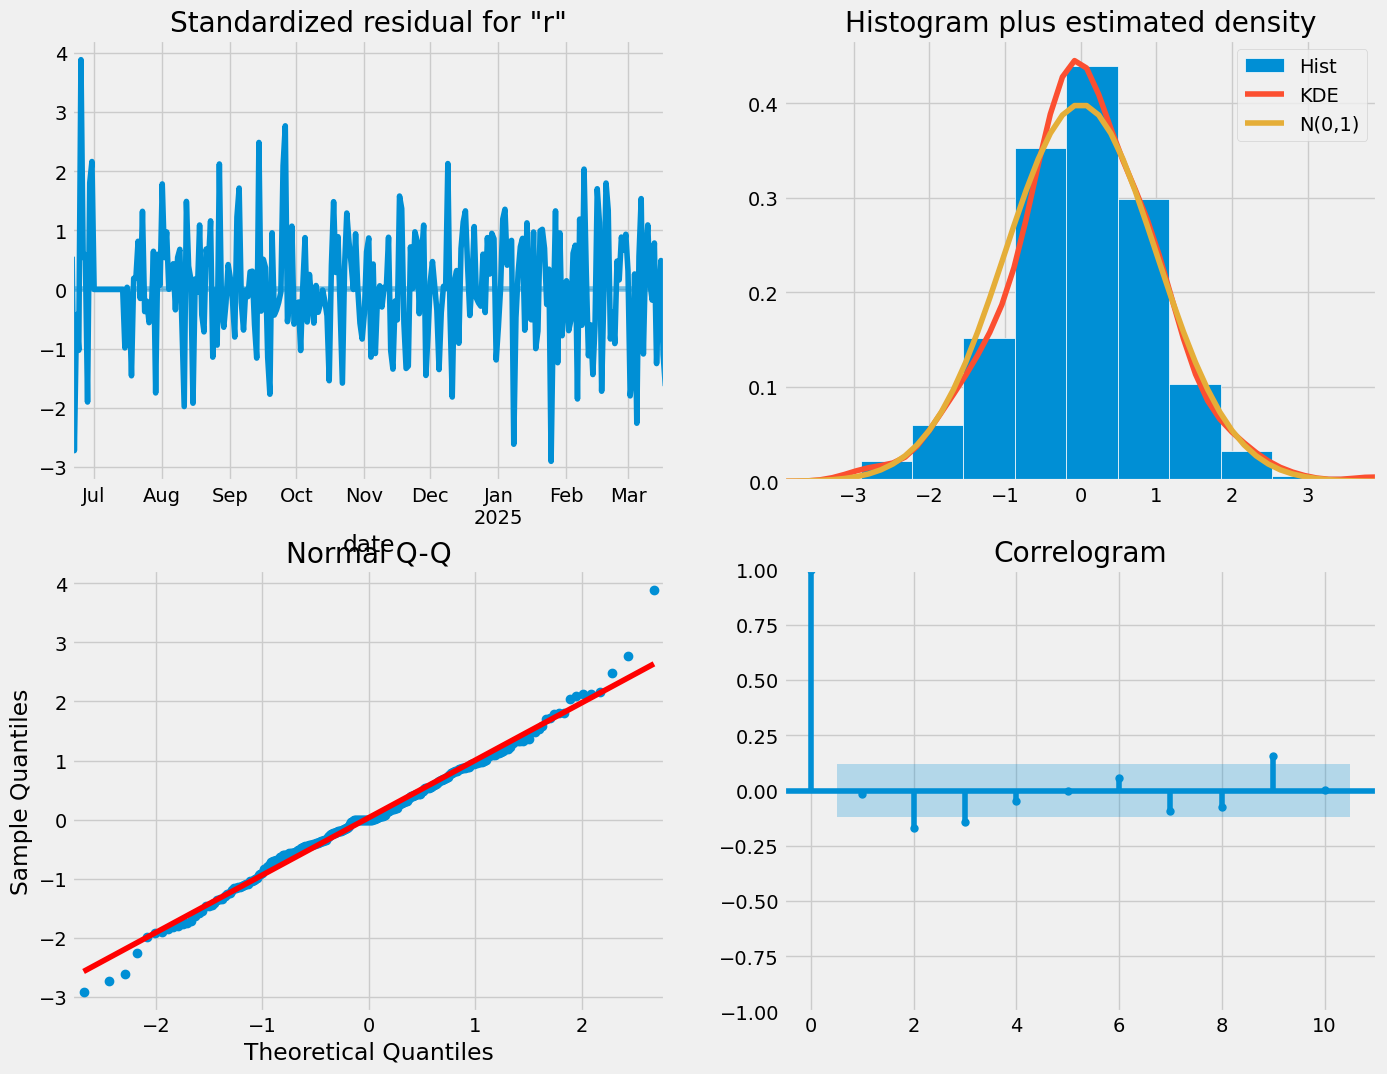

In [13]:

mod = sm.tsa.statespace.SARIMAX(patna_data_rh,
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()

The Root Mean Squared Error of our prediction is 3.62
2025-03-19    28.311769
2025-03-20    28.502612
2025-03-21    28.311121
2025-03-22    27.752387
2025-03-23    27.352431
2025-03-24    27.036916
2025-03-25    26.699112
2025-03-26    27.354399
2025-03-27    27.398276
2025-03-28    27.004383
2025-03-29    27.570888
2025-03-30    27.951803
2025-03-31    27.756997
2025-04-01    27.784450
2025-04-02    27.635691
2025-04-03    27.317686
2025-04-04    27.073210
2025-04-05    26.867955
2025-04-06    26.652658
2025-04-07    26.895955
Freq: D, Name: predicted_mean, dtype: float64


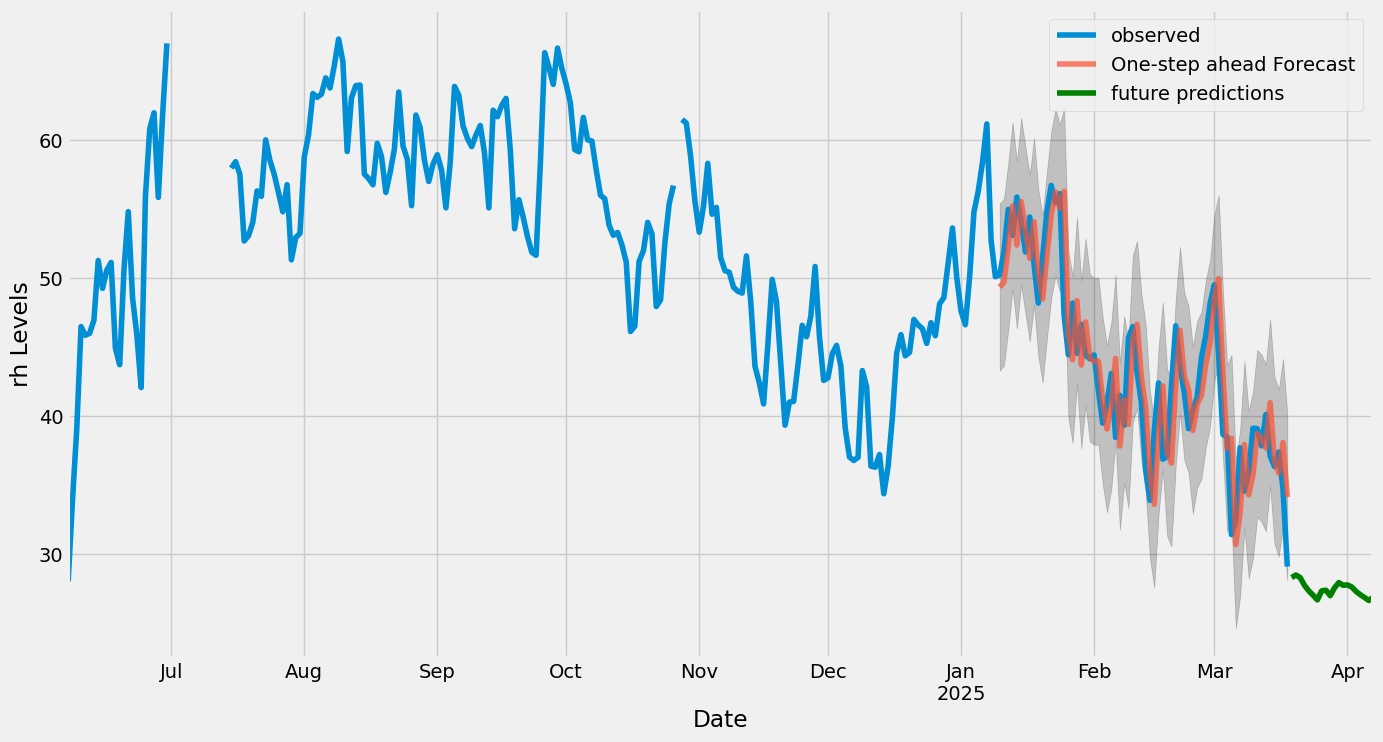

In [14]:

pred = results.get_prediction(start=pd.to_datetime('2025-01-10'), dynamic=False)
pred_ci = pred.conf_int()

ax = patna_data_rh['2024':].plot(figsize=[15, 8], label='observed')
pred.predicted_mean.plot(figsize=[15, 8], ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('rh Levels')
plt.legend()


patna_data_rh_forecasted = pred.predicted_mean
patna_data_rh_truth = patna_data_rh['2025-03-16':]

# Compute the mean square error
rmse = (((patna_data_rh_forecasted - patna_data_rh_truth) ** 2).mean()) ** 0.5
print('The Root Mean Squared Error of our prediction is {}'.format(round(rmse, 2)))

forecast = results.forecast(20)
print(forecast)
forecast.plot(figsize=[15, 8], color='green', label='future predictions')
plt.legend()
plt.show()